## Đọc và quan sát dữ liệu

In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\PC\Documents\Khai phá dữ liệu\Data chương 2\Data_Discretize.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Personal   500 non-null    object
 1   Gender     500 non-null    object
 2   Height_cm  500 non-null    int64 
 3   Weight_kg  500 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [2]:
#Hiển thị dữ liệu
data

,Personal,Gender,Height_cm,Weight_kg
0,P1,Male,174,96
1,P2,Male,189,87
2,P3,Female,185,110
3,P4,Female,195,104
4,P5,Male,149,61
...,...,...,...,...
495,P496,Female,150,153
496,P497,Female,184,121
497,P498,Female,141,136
498,P499,Male,150,95


In [3]:
#Quan sát đặc trưng thống kê
data.describe()

,Height_cm,Weight_kg
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [5]:
#Thuộc tính object
data.describe(include='O')

,Personal,Gender
count,500,500
unique,500,2
top,P1,Female
freq,1,255


## Tính toán BMI

In [6]:
def bmi(h,w):
    h = h/100
    bmi = round(w/(h**2),1)
    return bmi

In [15]:
data['BMI'] = data.apply(lambda row: bmi(row['Height_cm'], row['Weight_kg']),axis=1)
print(data)

    Personal  Gender  Height_cm  Weight_kg   BMI  Type
0         P1    Male        174         96  31.7     3
1         P2    Male        189         87  24.4     1
2         P3  Female        185        110  32.1     3
3         P4  Female        195        104  27.4     2
4         P5    Male        149         61  27.5     2
..       ...     ...        ...        ...   ...   ...
495     P496  Female        150        153  68.0     4
496     P497  Female        184        121  35.7     4
497     P498  Female        141        136  68.4     4
498     P499    Male        150         95  42.2     4
499     P500    Male        173        131  43.8     4

[500 rows x 6 columns]


In [9]:
#Dữ liệu BMI là 1 biến liên tục
data.describe()

,Height_cm,Weight_kg,BMI
count,500.000000,500.000000,500.0000
mean,169.944000,106.000000,37.7670
std,16.375261,32.382607,13.9663
min,140.000000,50.000000,12.8000
25%,156.000000,80.000000,27.1750
50%,170.500000,106.000000,37.0000
75%,184.000000,136.000000,46.4000
max,199.000000,160.000000,78.9000


## Rời rạc hóa dữ liệu
---
- 0: Underweight
- 1: Normal
- 2: Overweight
- 3: Obese
- 4: ExtremlyObese

In [10]:
#Rời rạc hóa theo khoảng cách
#Dựa vào chỉ số xác định mức béo phì
def check_bmi(x):
    if (x<18.5):
        return 0 
    elif (18.5 <= x <= 24.9):
        return 1
    elif (25.0 <= x <= 29.9):
        return 2
    elif (30.0 <= x <= 34.9):
        return 3
    else:
        return 4

In [16]:
#Thực hiện rời rạc hóa dl liên tục chỉ số BMI
data['Type'] = data['BMI'].apply(lambda x: check_bmi(x))
print(data.sample(5))

    Personal  Gender  Height_cm  Weight_kg   BMI  Type
133     P134  Female        167        110  39.4     4
322     P323    Male        153        104  44.4     4
497     P498  Female        141        136  68.4     4
88       P89  Female        159        104  41.1     4
137     P138    Male        194        108  28.7     2


In [17]:
#Nhóm dữ liệu theo Type
df_type = data[['Personal', 'Type']].groupby(['Type']).count()
print(df_type)

      Personal
Type          
0           34
1           64
2           70
3           64
4          268


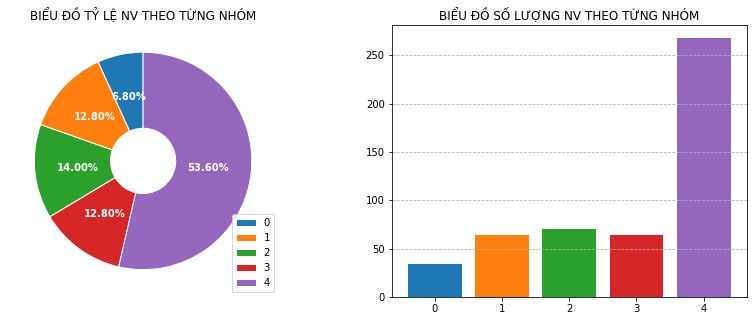

In [14]:
val = df_type.values
val = list(val.ravel())
lb = df_type.index
lb = list(lb)

import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
#plot 1:
plt.subplot(1,2,1)
plt.pie(val, labels=lb,
       autopct='%.2f%%',
       colors=color,
       startangle=90,
       textprops={'color':'w','fontweight':'bold'},
       wedgeprops=dict(width=0.7,edgecolor='w'))
plt.title('BIỂU ĐỒ TỶ LỆ NV THEO TỪNG NHÓM')
plt.legend(loc='lower right')

#Plot 2:
plt.subplot(1,2,2)
plt.bar(lb, val, color=color)
plt.title('BIỂU ĐỒ SỐ LƯỢNG NV THEO TỪNG NHÓM')
plt.grid(axis='y',ls='--')

plt.show()